# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-5-차이를 설명하는 통계모형-2-치킨주문-1 (65일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

### 1. 데이터 준비

SK 텔레콤 빅데이터 (bigdatahub.co.kr) 에서 제공하는 치킨 주문량 데이터 입니다. SK 텔레콤 통화량을 바탕으로 한달간 서울시의 25개 자치구 일일/연령대/성별 에 따른 치킨 업종 통화건수를 가지고 있습니다.  이런 자료에선 다음과 같은 가장 일반 적인 의문이 있을 수 있습니다.

* 누가 치킨을 많이 먹었는지

통화건수가 어떤 변수와 관련이 있는지 확인하고자 합니다.

In [4]:
# 치킨주문 데이터 파일 열기
options(encoding = 'euc-kr')
call_chichken <- read.csv("./Practice/data/call_chicken.csv")

### 2. 데이터 개요

In [10]:
# 일부 데이터를 확인합니다.

head(call_chichken)

기준일,요일,시군구,연령대,성별,통화건수
20170201,수,강남구,10대,남,55
20170201,수,강남구,10대,여,27
20170201,수,강남구,20대,남,115
20170201,수,강남구,20대,여,82
20170201,수,강남구,30대,남,148
20170201,수,강남구,30대,여,126


In [11]:
# 임의 데이터를 샘플로 보는 방밥이 있습니다. sample_n() 함수를 이용하면 임의 데이터를 눈으로 확인 할 수 있습니다.
require(dplyr)
set.seed(1234)
sample_n(call_chichken, 10)

,기준일,요일,시군구,연령대,성별,통화건수
954,20170204,토,관악구,40대,남,130
5221,20170218,토,동대문구,40대,여,83
5111,20170218,토,강동구,30대,여,139
5229,20170218,토,동작구,20대,여,58
7220,20170225,토,강북구,20대,남,84
5370,20170218,토,중구,10대,남,30
80,20170201,수,구로구,40대,여,72
1950,20170207,화,마포구,40대,남,72
5584,20170219,일,성동구,60대이상,남,8
4310,20170215,수,도봉구,40대,남,10


In [12]:
# 이제 데이터 구조를 확인 해 봅시다.
str(call_chichken)

'data.frame':	8390 obs. of  6 variables:
 $ 기준일  : int  20170201 20170201 20170201 20170201 20170201 20170201 20170201 20170201 20170201 20170201 ...
 $ 요일    : Factor w/ 7 levels "금","목","수",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ 시군구  : Factor w/ 25 levels "강남구","강동구",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 연령대  : Factor w/ 6 levels "10대","20대",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ 성별    : Factor w/ 2 levels "남","여": 1 2 1 2 1 2 1 2 1 2 ...
 $ 통화건수: int  55 27 115 82 148 126 111 244 42 71 ...


* 8390 건의 관측치가 있습니다.
* 모두 6개의 변수가 있습니다. 
* 기준일, 요일, 시군구, 연령대, 성별, 통화건수 등 모두 6개 변수 가 있습니다.
* 관심 변수는 통화건수 이며, 요일, 연령대, 시군구, 성별에 따른 관련을 살펴보고자 합니다.
* 이전에 봤던 다분산분석에 해당 할 수 있겠습니다.

### 3. 데이터 분석

먼저 책에서와 같이 시군구별 통화량을 살펴보아요

In [20]:
sum_sigungu <- aggregate(통화건수 ~ 시군구, data = call_chichken, sum)
sum_sigungu[order(sum_sigungu$통화건수, decreasing = T),]

,시군구,통화건수
4,강서구,47481
1,강남구,35655
5,관악구,31151
18,송파구,30338
20,영등포구,30152
9,노원구,26267
15,서초구,25422
2,강동구,23656
22,은평구,22884
14,서대문구,22772


강서구가 통화량이 제일 많고 도봉구가 가장 적습니다. 원이이 어디 있든지 간에 지역하고 통화량하고는 관계가 있는것 처럼 보입니다.

시군구,통화건수
강남구,35655
강동구,23656
강북구,19582
강서구,47481
관악구,31151
광진구,8442
구로구,17571
금천구,11327
노원구,26267
도봉구,8276


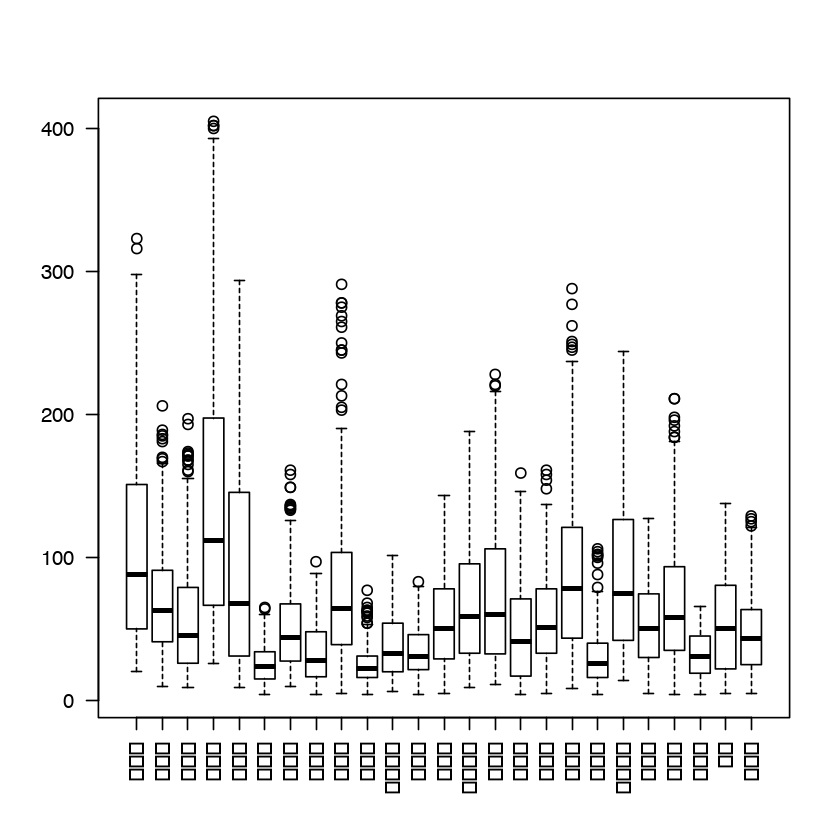

In [25]:
# 상자그림으로 먼저 살펴 보자.  일단 한글은 지금 주피터에서 깨져 나옵니다. rstudio 에서 한글 나옴. 나중에 문제 해결 할 것임
options(warn = -1)
par(family="AppleMyungjo")
boxplot(통화건수 ~ 시군구, data = call_chichken, las = 2)
sum_sigungu

통화건수하고 지역하고 관계가 있는지 여부는 분산분석을 하면 알 수 있습니다.

In [26]:
summary(aov(통화건수 ~ 시군구, data = call_chichken))

              Df   Sum Sq Mean Sq F value Pr(>F)    
시군구        24  6265645  261069   141.8 <2e-16 ***
Residuals   8365 15396289    1841                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

p 값이 0.05 보다 작은 2e-16 즉 거의 0 에 가깝습니다. 즉 정규분포에서 나올수 없는 통화량입니다. 이것은 다른 변수는 어떤지 살펴 보도록 합니다.

In [27]:
summary(aov(통화건수 ~ 연령대, data = call_chichken))

              Df   Sum Sq Mean Sq F value Pr(>F)    
연령대         5  8228983 1645797    1027 <2e-16 ***
Residuals   8384 13432951    1602                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [28]:
summary(aov(통화건수 ~ 성별, data = call_chichken))

              Df   Sum Sq Mean Sq F value   Pr(>F)    
성별           1   138583  138583   54.01 2.18e-13 ***
Residuals   8388 21523351    2566                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [29]:
summary(aov(통화건수 ~ 요일, data = call_chichken))

              Df   Sum Sq Mean Sq F value Pr(>F)    
요일           6   946229  157705   63.82 <2e-16 ***
Residuals   8383 20715704    2471                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

각각 p 값을 살펴보면 모두 유의수준 0.05 보다 훨씬 작습니다. 즉 통화량은 요일, 연령대, 성별 에 따라서 통화량이 차이가 있다고 할 수 있습니다. 이것의 대한 수준별 분석은 다음에 하기로 하고

다음에는 의사 이 데이터를 이용하여 의사결정 나무를 해보도록 하겠습니다.